In [ ]:
!pip install pystan~=2.14


  Using cached pystan-2.19.1.1-cp310-cp310-linux_x86_64.whl


In [4]:
# Fetch List of sp500 tickers
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime

def get_sp500_tickers():
  table = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
  sp500_df = table[0]

  tickers = sp500_df['Symbol'].tolist()

  tickers = [ticker.replace('.', '-') for ticker in tickers]

  return tickers


sp500_tickers = get_sp500_tickers()
print(sp500_tickers)

['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A', 'APD', 'ABNB', 'AKAM', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'AXON', 'BKR', 'BALL', 'BAC', 'BK', 'BBWI', 'BAX', 'BDX', 'BRK-B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BX', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF-B', 'BLDR', 'BG', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'COR', 'CNC', 'CNP', 'CF', 'CHRW', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CPAY', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'C

In [2]:
import yfinance as yf

In [ ]:
# Fetch csv files with historical data for each ticker containing only Date and Close columns
start_date = '2005-01-01'
end_date ='2024-02-24'

for ticker in sp500_tickers:
  stock_data = yf.download(ticker, start=start_date, end=end_date)

  close_data = stock_data[['Close']].reset_index()

  filename = f"{ticker}.csv"
  close_data.to_csv(filename)

In [ ]:
symbol = '^SPX'
start_date = '2010-01-01'
end_date = '2024-01-01'

stock_data = yf.download(symbol, start = start_date, end = end_date)

print(stock_data.head())

stock_data.to_csv('^SPX.csv')

# Load your CSV data into a DataFrame
data = pd.read_csv('^SPX.csv')

data = data[["Date", "Close"]]

data.columns = ["ds", "y"]
data

In [8]:
# Determine the split index for 80% training and 20% testing
split_index = int(0.8 * len(data))

# Split the shuffled DataFrame into training and testing DataFrames
train_df = data.iloc[:split_index]
test_df = data.iloc[split_index:]

# Save training and testing DataFrames to separate CSV files
train_df.to_csv('^SPX_train.csv', index=False)
test_df.to_csv('^SPX_test.csv', index=False)

In [9]:
from prophet import Prophet

prophet = Prophet(daily_seasonality=True)

prophet.fit(train_df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfjkq0251/dux4acsk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfjkq0251/6s8pleza.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39660', 'data', 'file=/tmp/tmpfjkq0251/dux4acsk.json', 'init=/tmp/tmpfjkq0251/6s8pleza.json', 'output', 'file=/tmp/tmpfjkq0251/prophet_modelfymxh5f3/prophet_model-20240330172940.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:29:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:29:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [10]:
future_dates = prophet.make_future_dataframe(periods=780)
predictions = prophet.predict(future_dates)

predictions_file = predictions[['ds', 'yhat']]
predictions_file.to_csv('SPY_prophet.csv', index=False)

In [11]:
from prophet.plot import plot_plotly
plot_plotly(prophet, predictions)

In [ ]:
# Split data
# unknown_data = data.iloc[-80:]
# data = data.iloc[:-90]

In [21]:
prophet = Prophet(daily_seasonality=True)
prophet.fit(data)

future_dates = prophet.make_future_dataframe(periods=780)
predictions = prophet.predict(future_dates)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfjkq0251/xarx7_1n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfjkq0251/p66xu8am.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69585', 'data', 'file=/tmp/tmpfjkq0251/xarx7_1n.json', 'init=/tmp/tmpfjkq0251/p66xu8am.json', 'output', 'file=/tmp/tmpfjkq0251/prophet_modelo6ttls0p/prophet_model-20240330173700.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:37:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:37:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


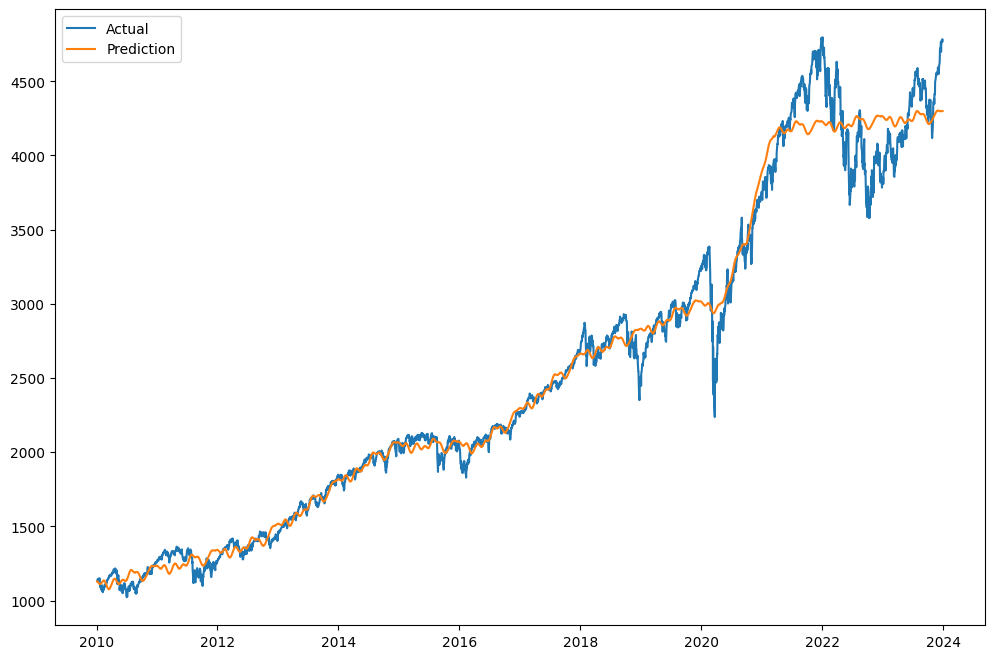

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

pred = predictions[predictions['ds'].isin(data['ds'])]

plt.plot(pd.to_datetime(data['ds']), data['y'], label="Actual")
plt.plot(pd.to_datetime(data['ds']), pred['yhat'], label="Prediction")

plt.legend()

In [23]:
import numpy as np

# Calculate absolute error
absolute_error = np.abs(data['y'] - pred['yhat'])

# Calculate percentage error
percentage_error = (absolute_error / data['y']) * 100

# Calculate MAPE
mape = percentage_error.mean()

print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape))


Mean Absolute Percentage Error (MAPE): 3.61%


In [27]:
import numpy as np

# Calculate the differences
differences = np.array(data['y']) - np.array(pred['yhat'])

# Square the differences
squared_differences = differences ** 2

# Calculate the mean of the squared differences
mse = np.mean(squared_differences)

# Take the square root of the MSE to get the RMSE
rmse = np.sqrt(mse)

print("RMSE:", rmse)


RMSE: 147.2080097101851
